<a href="https://colab.research.google.com/github/shivkumarganesh/Deep-Learning-Course/blob/main/Assignment-6/Part_B_Pytorch_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
try:
  import colab
  !pip install --upgrade pip
except:
  pass

     |████████████████████████████████| 1.6MB 12.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from google.colab import files
import zipfile

In [14]:
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [15]:
!kaggle datasets download -d puneet6060/intel-image-classification

 98% 339M/346M [00:05<00:00, 42.7MB/s]
100% 346M/346M [00:05<00:00, 61.0MB/s]


In [19]:
zf = '/content/intel-image-classification.zip'
zip_ref = zipfile.ZipFile(zf, 'r')
zip_ref.extractall('/content/intel-image-classification')
zip_ref.close()

In [26]:
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


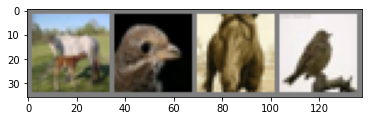

horse  bird horse  bird


In [4]:
class NeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [8]:
net = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [9]:

for epoch in range(10):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
        print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

[1,  2000] loss: 2.248
[1,  4000] loss: 1.909
[1,  6000] loss: 1.694
[1,  8000] loss: 1.586
[1, 10000] loss: 1.545
[1, 12000] loss: 1.497
[2,  2000] loss: 1.422
[2,  4000] loss: 1.396
[2,  6000] loss: 1.374
[2,  8000] loss: 1.349
[2, 10000] loss: 1.318
[2, 12000] loss: 1.304
[3,  2000] loss: 1.244
[3,  4000] loss: 1.220
[3,  6000] loss: 1.234
[3,  8000] loss: 1.208
[3, 10000] loss: 1.211
[3, 12000] loss: 1.196
[4,  2000] loss: 1.131
[4,  4000] loss: 1.129
[4,  6000] loss: 1.122
[4,  8000] loss: 1.133
[4, 10000] loss: 1.132
[4, 12000] loss: 1.116
[5,  2000] loss: 1.017
[5,  4000] loss: 1.066
[5,  6000] loss: 1.061
[5,  8000] loss: 1.074
[5, 10000] loss: 1.049
[5, 12000] loss: 1.067
[6,  2000] loss: 0.982
[6,  4000] loss: 0.986
[6,  6000] loss: 1.004
[6,  8000] loss: 1.026
[6, 10000] loss: 1.016
[6, 12000] loss: 0.988
[7,  2000] loss: 0.916
[7,  4000] loss: 0.946
[7,  6000] loss: 0.942
[7,  8000] loss: 0.964
[7, 10000] loss: 0.957
[7, 12000] loss: 1.004
[8,  2000] loss: 0.866
[8,  4000] 

KeyboardInterrupt: ignored

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1

for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))